In [6]:
import requests
from datetime import datetime, timedelta
import csv
import re

# Function to extract the number of results from the HTML
def extract_results(html):
    match = re.search(r'About ([\d,]+) results', html)
    if match:
        return int(match.group(1).replace(',', ''))
    return 0

# Function to generate date ranges
def generate_date_ranges(start_date, end_date):
    date_ranges = []
    current_date = start_date
    while current_date < end_date:
        next_date = current_date + timedelta(days=7)
        date_ranges.append((current_date, next_date))
        current_date = next_date
    return date_ranges

# Parameters
base_url = "https://www.google.com/search"
params_template = {
    "q": "elias pettersson",
    "sca_esv": "b2746cf197726f04",
    "sca_upv": "1",
    "rlz": "1C5CHFA_enDE996DE996",
    "biw": "1374",
    "bih": "779",
    "prmd": "invsmbtz",
    "sxsrf": "ADLYWIIk7GmkM3gEE4F8LVU6NMlVjhWWFA:1715377437644",
    "source": "lnt",
    "tbm": "nws"
}
headers = {
    "accept": "text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.7",
    "accept-language": "en-AU,en-US;q=0.9,en;q=0.8",
    "cookie": "REDACTED_FOR_SECURITY",
    "priority": "u=0, i",
    "referer": "https://www.google.com/",
    "sec-ch-ua": '"Chromium";v="124", "Google Chrome";v="124", "Not-A.Brand";v="99"',
    "sec-ch-ua-arch": '"arm"',
    "sec-ch-ua-bitness": '"64"',
    "sec-ch-ua-full-version": '"124.0.6367.201"',
    "sec-ch-ua-full-version-list": '"Chromium";v="124.0.6367.201", "Google Chrome";v="124.0.6367.201", "Not-A.Brand";v="99.0.0.0"',
    "sec-ch-ua-mobile": "?0",
    "sec-ch-ua-model": '""',
    "sec-ch-ua-platform": '"macOS"',
    "sec-ch-ua-platform-version": '"14.1.0"',
    "sec-ch-ua-wow64": "?0",
    "sec-fetch-dest": "document",
    "sec-fetch-mode": "navigate",
    "sec-fetch-site": "same-origin",
    "sec-fetch-user": "?1",
    "upgrade-insecure-requests": "1",
    "user-agent": "Mozilla/5.0 (Macintosh; Intel Mac OS X 10_15_7) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/124.0.0.0 Safari/537.36",
    "x-client-data": "REDACTED_FOR_SECURITY"
}


# Date range
start_date = datetime(2023, 10, 1)
end_date = datetime(2024, 5, 1)
date_ranges = generate_date_ranges(start_date, end_date)

# Output CSV file
csv_file = "google_search_results.csv"

# Write headers to CSV
with open(csv_file, mode='w', newline='') as file:
    writer = csv.writer(file)
    writer.writerow(["Start Date", "Num Results"])

# Iterate over date ranges and fetch results
for start, end in date_ranges:
    cd_min = start.strftime('%m/%d/%Y')
    cd_max = (end - timedelta(days=1)).strftime('%m/%d/%Y')
    params = params_template.copy()
    params['tbs'] = f"cdr:1,cd_min:{cd_min},cd_max:{cd_max}"
    
    response = requests.get(base_url, headers=headers, params=params)
    
    if response.status_code == 200:
        num_results = extract_results(response.text)
        print(f"From {cd_min} to {cd_max}: {num_results} results")
        
        # Append to CSV
        with open(csv_file, mode='a', newline='') as file:
            writer = csv.writer(file)
            writer.writerow([cd_min, num_results])
    else:
        print(f"Failed to fetch data for {cd_min} to {cd_max}")


From 10/01/2023 to 10/07/2023: 2040 results
From 10/08/2023 to 10/14/2023: 1890 results
From 10/15/2023 to 10/21/2023: 1980 results
From 10/22/2023 to 10/28/2023: 2110 results
From 10/29/2023 to 11/04/2023: 2280 results
From 11/05/2023 to 11/11/2023: 4460 results
From 11/12/2023 to 11/18/2023: 2180 results
From 11/19/2023 to 11/25/2023: 2260 results
From 11/26/2023 to 12/02/2023: 2680 results
From 12/03/2023 to 12/09/2023: 2440 results
From 12/10/2023 to 12/16/2023: 2390 results
From 12/17/2023 to 12/23/2023: 3830 results
From 12/24/2023 to 12/30/2023: 3790 results
From 12/31/2023 to 01/06/2024: 4010 results
From 01/07/2024 to 01/13/2024: 3620 results
From 01/14/2024 to 01/20/2024: 3620 results
From 01/21/2024 to 01/27/2024: 9070 results
From 01/28/2024 to 02/03/2024: 5960 results
From 02/04/2024 to 02/10/2024: 5140 results
From 02/11/2024 to 02/17/2024: 5140 results
From 02/18/2024 to 02/24/2024: 5170 results
From 02/25/2024 to 03/02/2024: 5020 results
From 03/03/2024 to 03/09/2024: 1

In [2]:
response

<Response [200]>

'<!doctype html><html lang="en-CA"><head><meta charset="UTF-8"><meta content="/images/branding/googleg/1x/googleg_standard_color_128dp.png" itemprop="image"><title>elias pettersson - Google Search</title><script nonce="2PVCMWZJVLaM14eVpxJX3A">(function(){\ndocument.documentElement.addEventListener("submit",function(b){var a;if(a=b.target){var c=a.getAttribute("data-submitfalse");a="1"===c||"q"===c&&!a.elements.q.value?!0:!1}else a=!1;a&&(b.preventDefault(),b.stopPropagation())},!0);document.documentElement.addEventListener("click",function(b){var a;a:{for(a=b.target;a&&a!==document.documentElement;a=a.parentElement)if("A"===a.tagName){a="1"===a.getAttribute("data-nohref");break a}a=!1}a&&b.preventDefault()},!0);}).call(this);(function(){window.google=window.google||{};var a=window.performance&&window.performance.timing&&"navigationStart"in window.performance.timing,b=google.stvsc&&google.stvsc.ns,c=a?b||window.performance.timing.navigationStart:void 0,d=google.stvsc&&google.stvsc.rs,f=
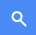
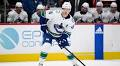

In [3]:
response.text